In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.metrics import f1_score, average_precision_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Supress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

# Explore Dataset

In [2]:
df = pd.read_csv("Interview_Dataset.csv")
df.head()

,Y,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63
0,1,A,X1,M1,M1,Y,Y,N1,N,-0.583532,...,-1.320000e-10,-1.130000e-10,-0.00088,-0.000038,-0.000119,-0.000245,-0.000189,-0.790472,1.274462,-4.005563
1,1,B,X2,M1,M2,Y,Y,N2,N,-0.583532,...,-1.310000e-10,-1.130000e-10,-0.00088,0.000010,-0.000087,-0.000238,-0.000185,-0.791634,1.274462,-4.153800
2,0,A,X1,M1,M3,Y,Y,N1,N,-0.583532,...,-1.280000e-10,-1.120000e-10,-0.00088,-0.000038,-0.000015,0.000024,-0.000189,1.496376,1.274462,-4.016141
3,0,B,X1,M1,M2,Y,Y,N1,N,-0.583532,...,-1.330000e-10,-1.130000e-10,-0.00088,-0.000037,0.000019,-0.000246,-0.000094,-0.778778,1.274462,-4.024441
4,0,C,X1,M1,M3,Y,Y,N1,N,-0.583532,...,-1.290000e-10,-1.140000e-10,-0.00088,-0.000038,0.000146,-0.000243,-0.000128,-0.789815,1.274462,-4.025124


This dataset is consists of (50000, 63)
The Number of nulls in dataset 0


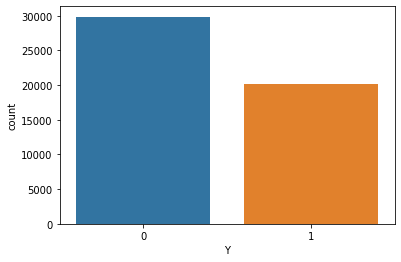

In [3]:
#Check balance of dataset
print("This dataset is consists of",df.shape)
no_of_nulls = df.isnull().sum().sum()
print("The Number of nulls in dataset",no_of_nulls)
sns.countplot(df['Y'],label="Count")

In [4]:
df = pd.get_dummies(df, 
                     columns = ["X2", "X3","X4","X5","X6","X7","X8","X9"],
                     prefix  = ["X2", "X3","X4","X5","X6","X7","X8","X9"],
                     drop_first=True
                    )
df.columns

Index(['Y', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18',
       'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28',
       'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38',
       'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48',
       'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58',
       'X59', 'X60', 'X61', 'X62', 'X63', 'X2_B', 'X2_C', 'X2_D', 'X2_E',
       'X3_X2', 'X3_X3', 'X3_X4', 'X3_X5', 'X3_X6', 'X3_X7', 'X4_M2', 'X4_M3',
       'X4_M4', 'X4_M5', 'X4_M6', 'X4_M7', 'X4_M8', 'X5_M2', 'X5_M3', 'X6_Y',
       'X7_Y', 'X8_N10', 'X8_N11', 'X8_N12', 'X8_N13', 'X8_N14', 'X8_N15',
       'X8_N2', 'X8_N3', 'X8_N4', 'X8_N5', 'X8_N6', 'X8_N7', 'X8_N8', 'X8_N9'],
      dtype='object')

In [5]:
len(df.columns)

90

# Correlation among feature in original dataset

Text(0.5, 1.05, 'Correlation of Features')

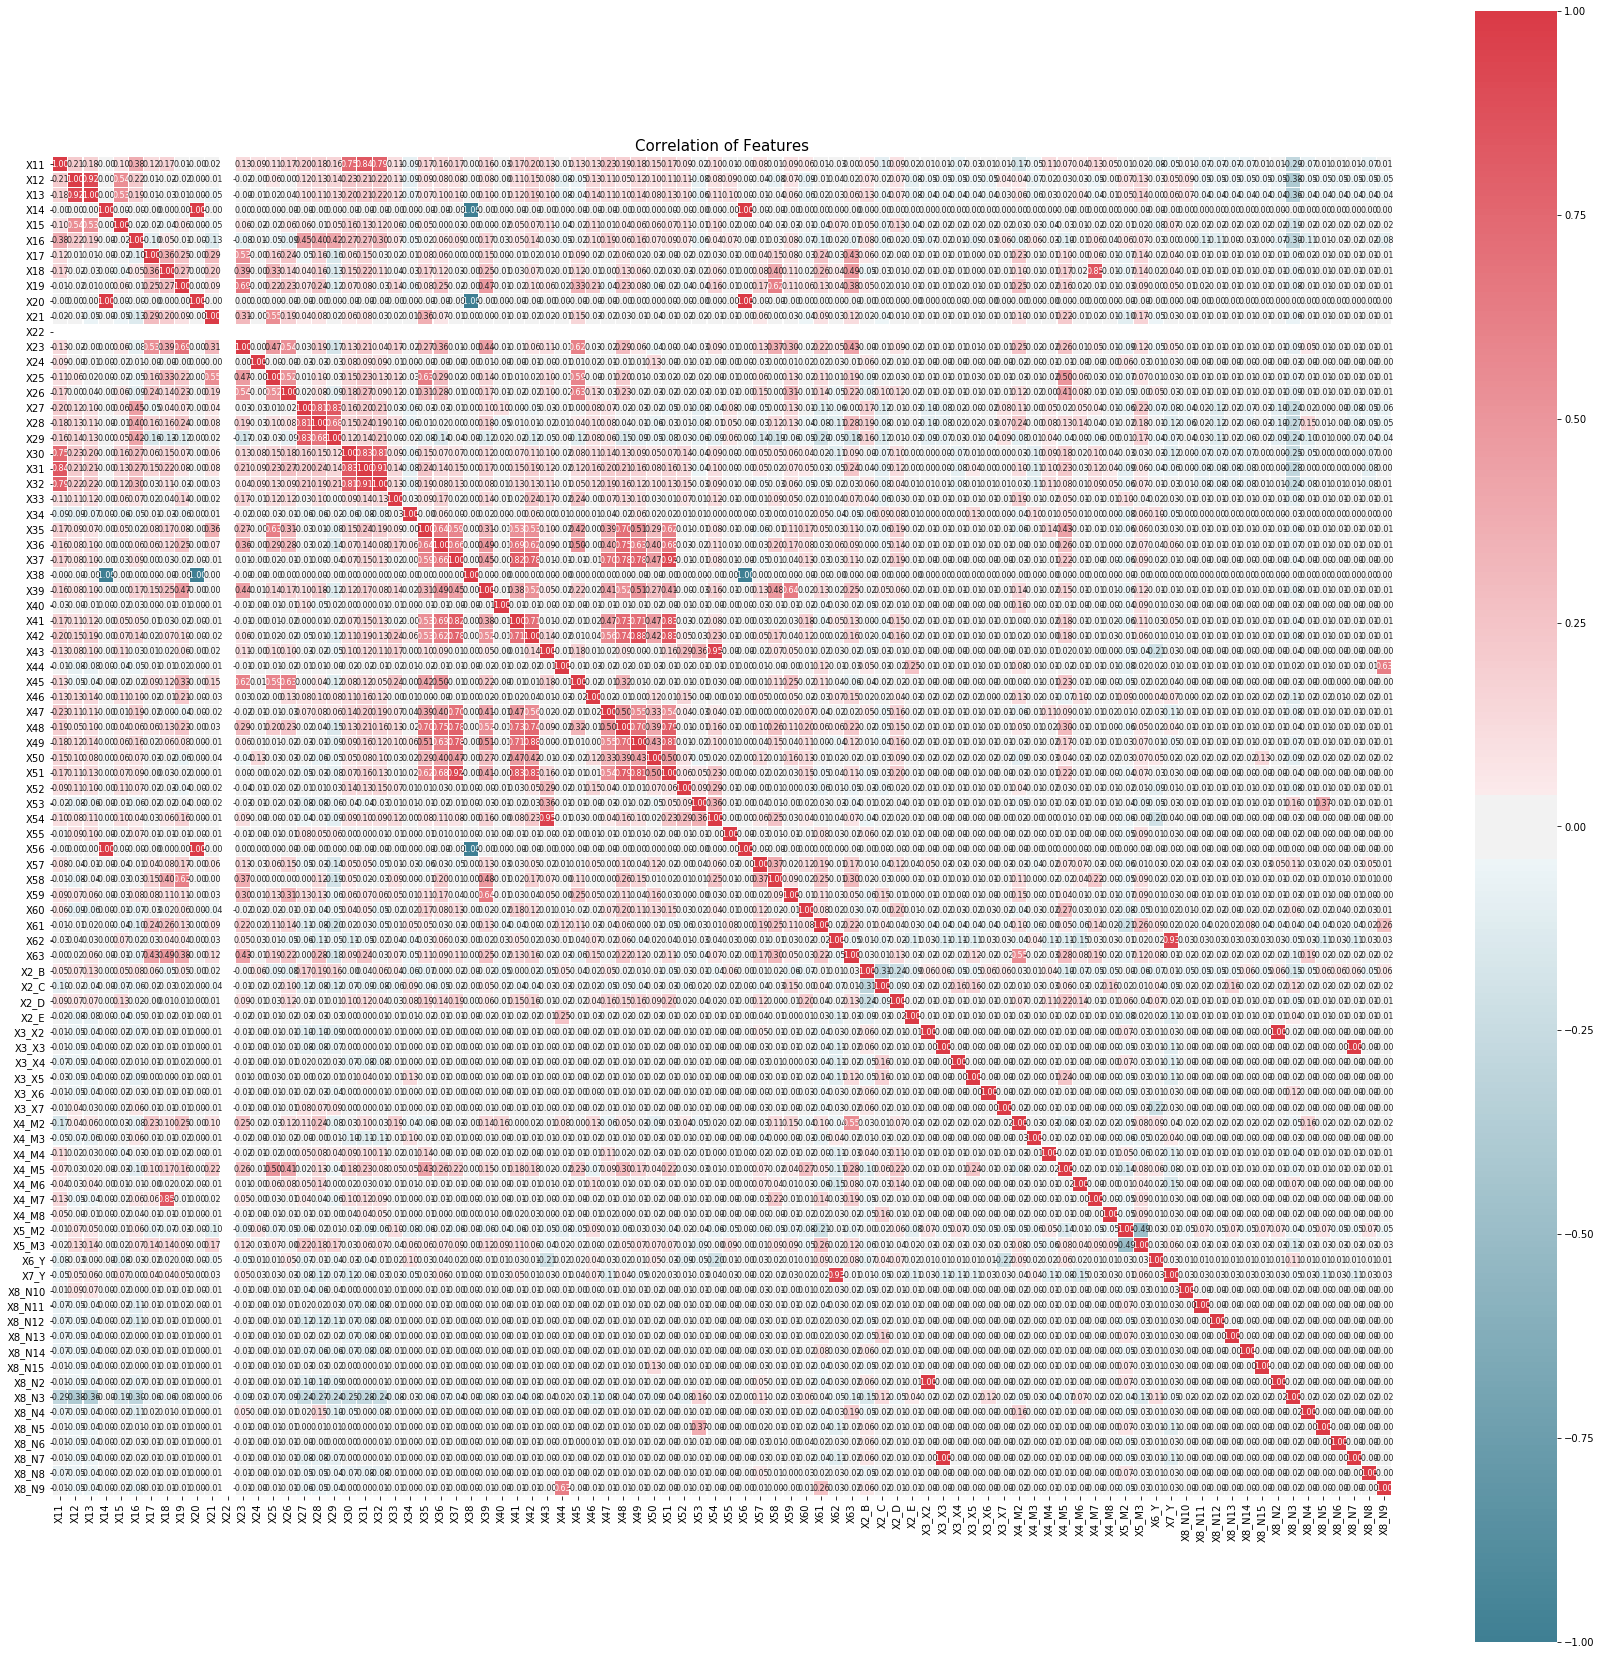

In [6]:
corr = df.iloc[:,2:].corr()
colormap = sns.diverging_palette(220, 10, as_cmap = True)
plt.figure(figsize=(30,30))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},
            cmap = colormap, linewidths=0.1, linecolor='white')
plt.title('Correlation of Features', y=1.05, size=15)

In [7]:
df.drop(["X14", "X20", "X22", "X38", "X56"], axis=1, inplace=True)

# PCA


Feature Correlation:



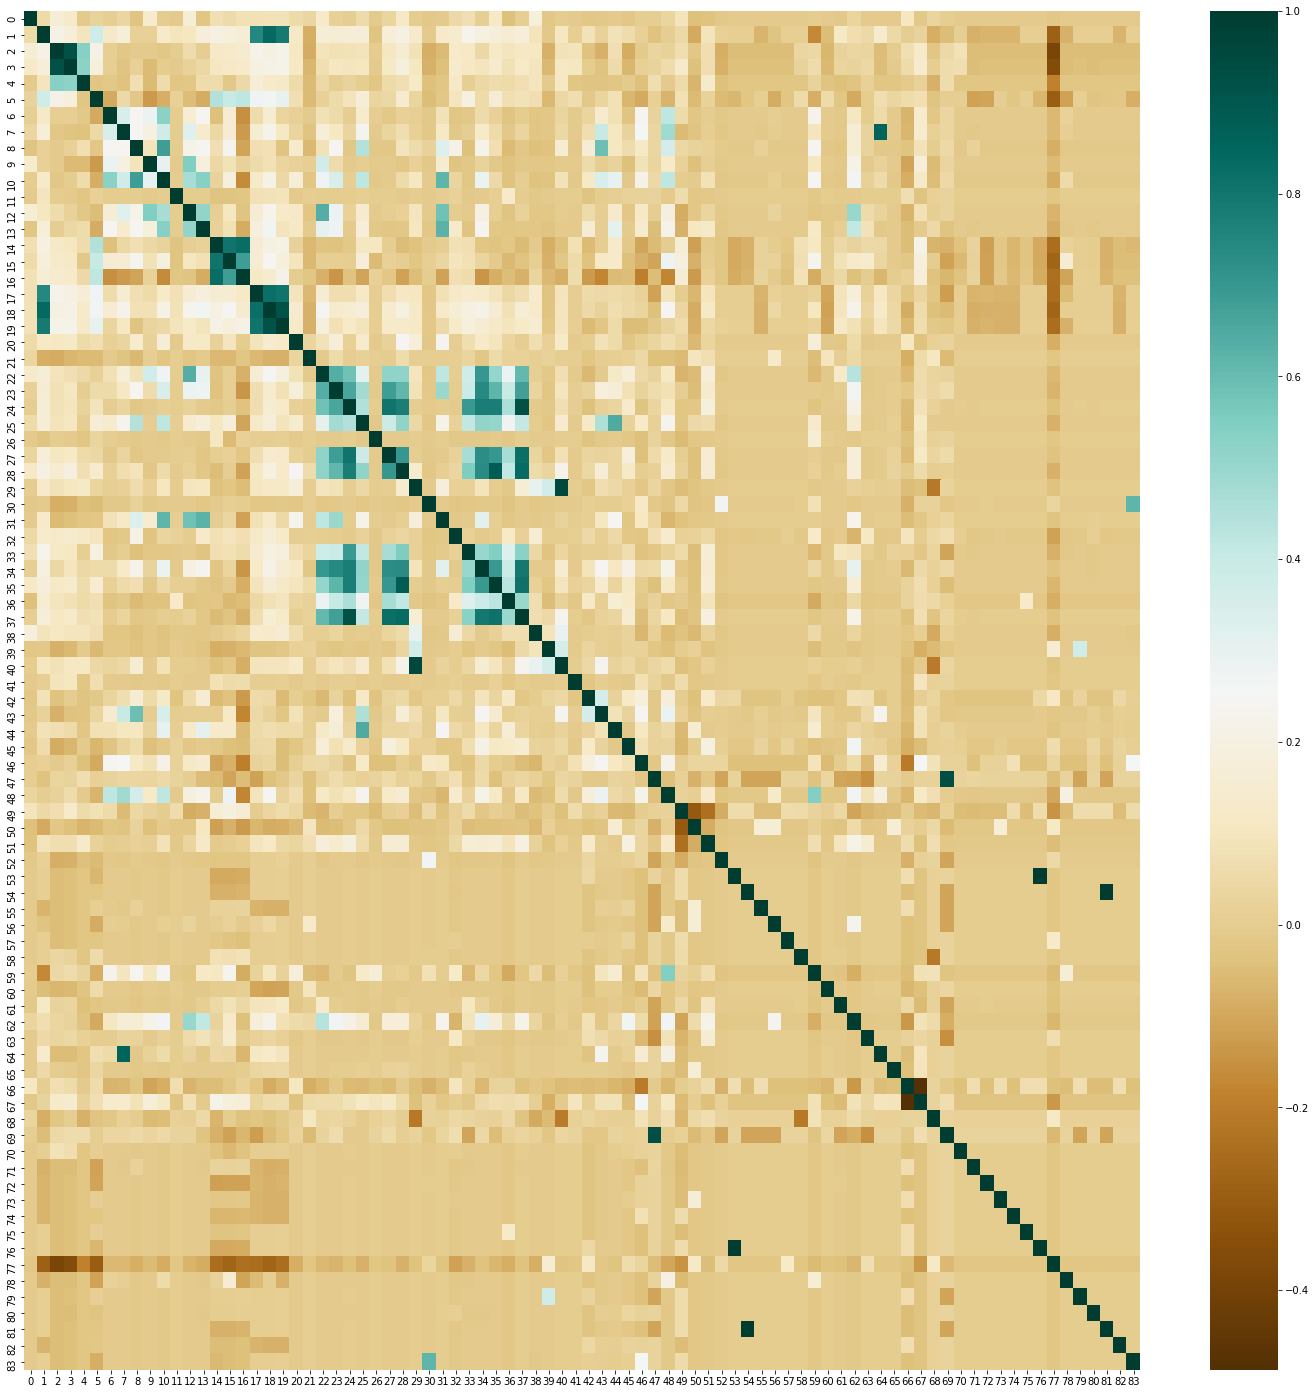

In [8]:
X = df[df.columns[1:]]
y = df[["Y"]]

from sklearn.decomposition import PCA
variance_pct = 5 # Minimum percentage of variance we want to be described by the resulting transformed components

pca = PCA(n_components=variance_pct) # Create PCA object

X_transformed = MinMaxScaler().fit_transform(X,y)
X_pca = pd.DataFrame(X_transformed) # Create a data frame from the PCA'd data

X_train, X_test, Y_train, Y_test = train_test_split(X_pca, y, test_size=0.3)

print("\nFeature Correlation:\n")
plt.figure(figsize=(25,25))

g = sns.heatmap(X_train.corr(),cmap="BrBG",annot=False)

In [9]:
print("Training Data :",X_train.shape)
print("Testing Data :",X_test.shape)

Training Data : (35000, 84)
Testing Data : (15000, 84)


# Logistic Regression

Accuracy of Logistic Regression on original training set: 0.86
Accuracy of Logistic Regression on original test set: 0.86
Accuracy 0.86:
Precision 0.88:
Recall: 0.76
F1: 0.82
Area under precision Recall: 0.77


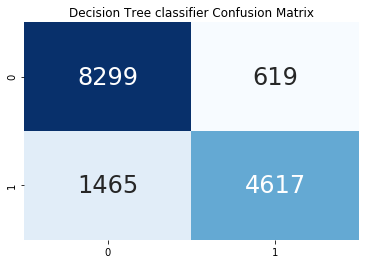

In [10]:
clf1 = LogisticRegression()
clf1.fit(X_train, Y_train)

print('Accuracy of Logistic Regression on original training set: {:.2f}'.format(clf1.score(X_train, Y_train)))
print('Accuracy of Logistic Regression on original test set: {:.2f}'.format(clf1.score(X_test, Y_test)))

y_pred=clf1.predict(X_test)
print("Accuracy {:.2f}:".format(clf1.score(X_test, Y_test)))
print("Precision {:.2f}:".format(precision_score(Y_test, y_pred)))
print("Recall: {:.2f}".format(recall_score(Y_test, y_pred)))
print("F1: {:.2f}".format(f1_score(Y_test, y_pred)))
print("Area under precision Recall: {:.2f}".format(average_precision_score(Y_test, y_pred)))

clf1_cm = confusion_matrix(Y_test,y_pred)
plt.title("Decision Tree classifier Confusion Matrix")
sns.heatmap(clf1_cm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

# Decision Tree classifier

Accuracy of Decision Tree classifier on original training set: 0.82
Accuracy of Decision Tree classifier on original test set: 0.82
Accuracy 0.82:
Precision 0.88:
Recall: 0.64
F1: 0.74
Area under precision Recall: 0.71


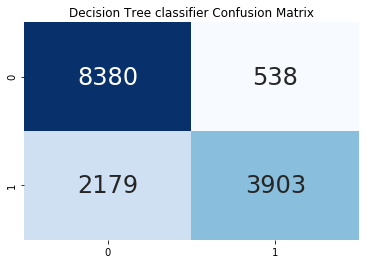

In [12]:
clf2 = DecisionTreeClassifier(max_depth=3,min_samples_leaf=30)
clf2.fit(X_train, Y_train)

print('Accuracy of Decision Tree classifier on original training set: {:.2f}'.format(clf2.score(X_train, Y_train)))
print('Accuracy of Decision Tree classifier on original test set: {:.2f}'.format(clf2.score(X_test, Y_test)))

y_pred=clf2.predict(X_test)
print("Accuracy {:.2f}:".format(clf2.score(X_test, Y_test)))
print("Precision {:.2f}:".format(precision_score(Y_test, y_pred)))
print("Recall: {:.2f}".format(recall_score(Y_test, y_pred)))
print("F1: {:.2f}".format(f1_score(Y_test, y_pred)))
print("Area under precision Recall: {:.2f}".format(average_precision_score(Y_test, y_pred)))

clf2_cm = confusion_matrix(Y_test,y_pred)
plt.title("Decision Tree classifier Confusion Matrix")
sns.heatmap(clf2_cm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

# Random Forest Classifier

Accuracy of RF Tree classifier on original training set: 1.00
Accuracy of RF Tree classifier on original test set: 1.00
Accuracy 1.00:
Precision 1.00:
Recall: 1.00
F1: 1.00
Area under precision Recall: 1.00


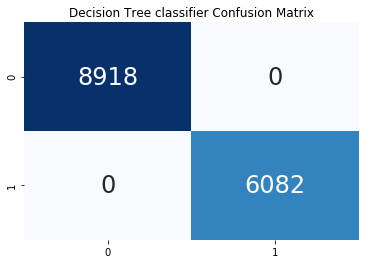

In [18]:
clf3 = RandomForestClassifier(n_estimators=100,random_state=30)
clf3.fit(X_train, Y_train)

print('Accuracy of RF Tree classifier on original training set: {:.2f}'.format(clf3.score(X_train, Y_train)))
print('Accuracy of RF Tree classifier on original test set: {:.2f}'.format(clf3.score(X_test, Y_test)))

y_pred=clf3.predict(X_test)
print("Accuracy {:.2f}:".format(clf3.score(X_test, Y_test)))
print("Precision {:.2f}:".format(precision_score(Y_test, y_pred)))
print("Recall: {:.2f}".format(recall_score(Y_test, y_pred)))
print("F1: {:.2f}".format(f1_score(Y_test, y_pred)))
print("Area under precision Recall: {:.2f}".format(average_precision_score(Y_test, y_pred)))

clf3_cm = confusion_matrix(Y_test,y_pred)
plt.title("Decision Tree classifier Confusion Matrix")
sns.heatmap(clf3_cm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})